In [2]:
%load_ext autoreload
%autoreload 2

In [17]:
from exposure_matrices import *
import seaborn as sns
import numpy as np
from matplotlib import colormaps, pyplot as plt, colors
from sklearn.decomposition import PCA
import plotly.express as px

In [4]:
data = load_data(2022)
racial_pops = ["AM_IND", "BLACK", "HISP", "ASIAN", "WHITE", "Multi"]
racial_pops_prefixed = list(map(lambda s: "NUM_" + s, racial_pops))
county_names = [
    "NEW YORK",
    "BRONX",
    "QUEENS",
    "KINGS",
    "WESTCHESTER",
    "NYC",
    "NY STATE",
    "ONONDAGA",
    "OSWEGO",
]

In [5]:
# plot_exposure_matrices(data, county_names, racial_pops, renormalize=False)
# plot_exposure_matrices(data, county_names, racial_pops, renormalize=True)
county_names = list(data.COUNTY_NAME.unique())

In [21]:
E_s = [get_exposure_mat(data, county_name, racial_pops_prefixed, renormalize=True) for county_name in county_names]
E_labels = sum([[f"{county_name} {racial_pop}" for racial_pop in racial_pops] for county_name in county_names], [])
E_race_labels = sum([[f"{racial_pop}" for racial_pop in racial_pops] for _ in county_names], [])
E_county_labels = sum([[f"{county_name}" for racial_pop in racial_pops] for county_name in county_names], [])

In [25]:
pca = PCA(n_components=3)
E_s = np.concatenate(E_s, axis=0)
E_pca = pca.fit_transform(E_s)

<Axes: >

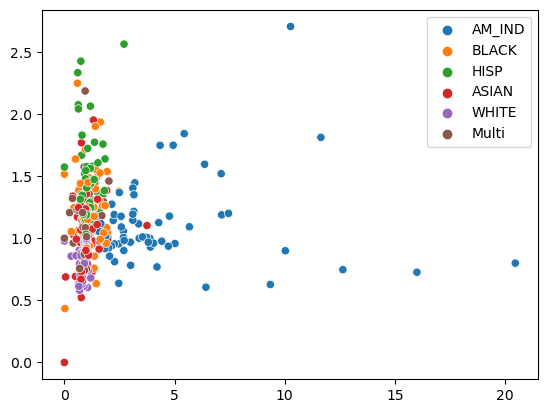

In [12]:
# E_s.shape
# E_race_labels
sns.scatterplot(x=E_s[:, 0],y= E_s[:, 2], hue=E_race_labels)

In [11]:
px.scatter_3d(x=E_pca[:, 0], y=E_pca[:, 1], z=E_pca[:, 2], color=E_race_labels)
# sns.scatterplot(x=E_pca[:, 1], y=E_pca[:, 2], ax=ax, hue=E_race_labels)

# ax.set(aspect="equal")
# E_flattened

In [28]:
E_to_csv = pd.DataFrame(E_s, index=E_labels,  columns=racial_pops,)
E_to_csv["county"] = E_county_labels
E_to_csv["demographic"] = E_race_labels

E_to_csv.to_csv(output_path / "exposure_matrices.csv", index=True)

In [30]:

E_pca_to_csv = pd.DataFrame(E_pca, index=E_labels, columns=[f"component {i}" for i in range(1, 4)],)
E_pca_to_csv["county"] = E_county_labels
E_pca_to_csv["demographic"] = E_race_labels

E_pca_to_csv.to_csv(output_path / "pca_exposure_matrices.csv", index=True)